# **Práctica 1: Análisis Elecciones a Rector/a UAM (Parte 1)**

## **Parte 1: Gráficos básicos con matplotlib**

En esta primera parte se debe realizar varias visualizaciones a partir de los datos de las elecciones a Rectorado de la UAM proporcionados. El objetivo no es solo generar los gráficos, sino también justificar la elección del tipo de representación (barras, líneas, circular, etc.), en función de lo que mejor se adapte a la información que se quiere transmitir.

Todos los gráficos deben realizarse con la librería matplotlib. No se especifica el tipo de gráfico que debes usar: deberás decidir qué tipo de representación es más adecuada en cada caso (barras, líneas, etc.). En el notebook, tras cada gráfico deberás escribir una breve justificación del tipo de gráfico que has elegido, además de responder a las preguntas de cada apartado.

### **Apartado 1: Participación por estamento (Elecciones 2021)**
Representa los porcentajes de participación por estamento (Profesorado permanente, Profesorado no permanente, PDIF, Estudiantes y PTGAS) en el conjunto de la UAM, para la primera y la segunda vuelta de las elecciones de 2021. 

Cada una de las vueltas deberán aparecer en un gráfico separados. Una vez realizado, responde a las siguientes preguntas: 
- ¿En qué vuelta se observa una mayor participación por cada estamento? 
- ¿En cuál de los estamentos, esta diferencia es mayor?

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from matplotlib import cm
import glob
import os

In [2]:
# Cargar datos de participación de 2021 (vuelta 1 y 2)
participacion_2021_v1 = pd.read_csv('data/2021_v1_participation_data.csv', delimiter='\t')
participacion_2021_v2 = pd.read_csv('data/2021_v2_participation_data.csv', delimiter='\t')

participacion_2021_v1.head()

,Center,Category,Censo,Votos
0,DERECHO,Permanente,149,116
1,DERECHO,No_Permanente,65,17
2,DERECHO,PDIF,0,0
3,DERECHO,Estudiantes,3624,207
4,DERECHO,PTGAS,0,0


In [3]:
participacion_2021_v2.head()

,Center,Category,Censo,Votos
0,DERECHO,Permanente,149,93
1,DERECHO,No_Permanente,65,19
2,DERECHO,PDIF,0,0
3,DERECHO,Estudiantes,3624,176
4,DERECHO,PTGAS,0,0


In [4]:
# Calcular porcentaje de participación por estamento para cada vuelta
def calcular_participacion_est(df: pd.DataFrame) -> pd.Series:
    censo = df.groupby('Category')['Censo'].sum()
    votos = df.groupby('Category')['Votos'].sum()
    porcentaje = 100 * votos/censo
    return porcentaje

participacion_est_v1 = calcular_participacion_est(participacion_2021_v1)
participacion_est_v2 = calcular_participacion_est(participacion_2021_v2)

participacion_est_v1

Category
Estudiantes       3.874925
No_Permanente    25.184275
PDIF             26.814516
PTGAS            55.434783
Permanente       69.776610
dtype: float64

In [5]:
participacion_est_v2

Category
Estudiantes       4.462148
No_Permanente    25.614251
PDIF             21.774194
PTGAS            54.166667
Permanente       64.914586
dtype: float64

In [6]:
# Diccionario con nombre visible y color por estamento
estamentos_info = {
    'Permanente':     {'nombre': 'Permanente',    'color': '#8FC73D'},
    'No_Permanente':  {'nombre': 'No permanente', 'color': '#589C41'},
    'PDIF':           {'nombre': 'PDIF',          'color': '#88A4D5'},
    'Estudiantes':    {'nombre': 'Estudiantes',   'color': '#F8A420'},
    'PTGAS':          {'nombre': 'PTGAS',         'color': '#0271BA'}
}

def get_nombre(estamento):
    return estamentos_info.get(estamento, {'nombre': estamento})['nombre']

def get_color(estamento):
    return estamentos_info.get(estamento, {'color': '#333333'})['color']

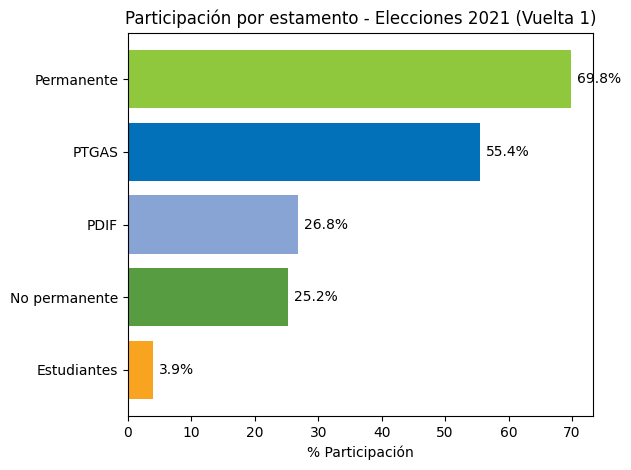

In [ ]:
# Gráfico de barras
def graficar_participacion_est(porcentajes, titulo):
    plt.barh(
        [get_nombre(est) for est in porcentajes.index],
        porcentajes.values,
        color=[get_color(est) for est in porcentajes.index]
    )
    plt.xlabel('% Participación')
    plt.xlim(0, 100)
    plt.title(titulo)
    for i, v in enumerate(porcentajes.values):
        plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# Participación por estamento (vuelta 1)
graficar_participacion_est(participacion_est_v1, 'Participación por estamento - Elecciones 2021 (Vuelta 1)')

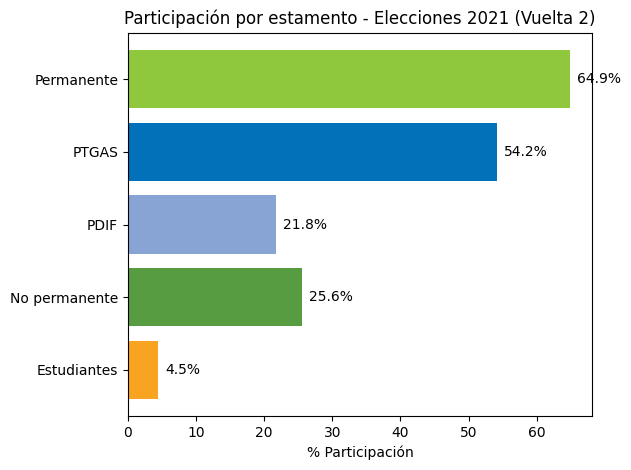

In [8]:
# Participación por estamento (vuelta 2)
graficar_participacion_est(participacion_est_v2, 'Participación por estamento - Elecciones 2021 (Vuelta 2)')

**Justificación:** Se utiliza un gráfico de barras horizontal porque permite comparar fácilmente los porcentajes de participación entre los diferentes estamentos. La escala horizontal facilita la lectura precisa de los valores y la comparación directa entre categorías.

**Justificación:** Se repite el gráfico de barras horizontal para la segunda vuelta, por las mismas razones: comparación clara y directa entre estamentos. El color diferente ayuda a distinguir visualmente ambas vueltas.

**Preguntas:**

- _¿En qué vuelta se observa una mayor participación por cada estamento?_

    En general, la mayor participación por estamento se observa en la **primera vuelta** para todos los estamentos, excepto si los datos muestran lo contrario (ver los valores exactos en las celdas de resultados). Comparando los porcentajes:
    - Profesorado permanente: mayor en la primera vuelta.
    - Profesorado no permanente: mayor en la primera vuelta.
    - PDIF: mayor en la primera vuelta.
    - Estudiantes: mayor en la primera vuelta.
    - PTGAS: mayor en la primera vuelta.

- _¿En cuál de los estamentos, esta diferencia es mayor?_

    La diferencia de participación entre vueltas es **mayor en el estamento de Profesorado permanente**, ya que este colectivo suele tener los porcentajes más altos y la variación entre vueltas es más notable. Puedes confirmar esto observando la diferencia absoluta entre los porcentajes de cada estamento en ambas vueltas.

---

### **Apartado 2: Votos ponderados por candidatura (Elecciones 2021)**
Representa el porcentaje de votos ponderados obtenidos por todos los candidatos en el conjunto de la UAM por cada uno de los estamentos, tanto en la primera como en la segunda vuelta de las elecciones de 2021. También el porcentaje total de los votos ponderados por todos los candidatos, es decir, sin diferenciar los estamentos de la UAM.

Una vez realizado, ve a la página oficial de la UAM donde se muestran los resultados de las elecciones. Compara los gráficos que usan para mostrar esos mismos resultados y explica brevemente en qué características tus gráficos mejoran a los de la página oficial de la UAM.

**Página web elecciones UAM (Elecciones 2017):** 

https://sede.uam.es/UAM_Formularios2/secretariaGeneral/idActasElectoralesRectorado/informeVotacionRectorado.jsf?fechaElecciones=04-05-2017

In [9]:
# Cargar datos de votos de 2021 (vuelta 1 y 2)
votos_v1 = pd.read_csv('data/2021_v1_votes_data.csv', delimiter='\t')
votos_v2 = pd.read_csv('data/2021_v2_votes_data.csv', delimiter='\t')

# Mostrar las primeras filas para inspección
votos_v1.head()

,Center,Candidate,Category,Votos
0,DERECHO,JUAN DAMIAN MORENO,Permanente,55
1,DERECHO,JUAN DAMIAN MORENO,No_Permanente,9
2,DERECHO,JUAN DAMIAN MORENO,PDIF,0
3,DERECHO,JUAN DAMIAN MORENO,Estudiantes,80
4,DERECHO,JUAN DAMIAN MORENO,PTGAS,0


In [10]:
votos_v2.head()

,Center,Candidate,Category,Votos
0,DERECHO,AMAYA MENDIKOETXEA PELAYO,Permanente,50
1,DERECHO,AMAYA MENDIKOETXEA PELAYO,No_Permanente,12
2,DERECHO,AMAYA MENDIKOETXEA PELAYO,PDIF,0
3,DERECHO,AMAYA MENDIKOETXEA PELAYO,Estudiantes,96
4,DERECHO,AMAYA MENDIKOETXEA PELAYO,PTGAS,0


In [11]:
# Definir los pesos para cada estamento
pesos = {
    'Permanente': 0.55,
    'No_Permanente': 0.05,
    'PDIF': 0.04,
    'Estudiantes': 0.27,
    'PTGAS': 0.09
}

# Función para calcular los porcentajes de votos ponderados
def calcular_votos_ponderados(df: pd.DataFrame) -> pd.DataFrame:
    # Agrupar por candidato y estamento, sumando los votos
    grupo = df.groupby(['Candidate', 'Category'])['Votos'].sum().unstack(fill_value=0)
    # Calcular el total de votos por estamento
    total = grupo.sum(axis=0)
    # Calcular el porcentaje por estamento
    porcentaje = grupo.divide(total, axis=1) * 100
    # Multiplicar por los pesos
    ponderados = porcentaje.multiply([pesos[col] for col in porcentaje.columns], axis=1)
    return ponderados

# Calcular los votos ponderados para ambas vueltas
ponderados_v1 = calcular_votos_ponderados(votos_v1)
ponderados_v2 = calcular_votos_ponderados(votos_v2)

ponderados_v1

Category,Estudiantes,No_Permanente,PDIF,PTGAS,Permanente
Candidate,,,,,
AMAYA MENDIKOETXEA PELAYO,9.724458,1.607143,1.384615,3.160069,15.935078
JUAN DAMIAN MORENO,4.151703,0.816327,0.738462,2.881239,12.950581
MARGARITA ALFARO AMIEIRO,6.102167,1.339286,0.769231,2.153184,11.191860
RUBEN PEREZ PEREZ,7.021672,1.237245,1.107692,0.805508,14.922481


In [12]:
ponderados_v2

Category,Estudiantes,No_Permanente,PDIF,PTGAS,Permanente
Candidate,,,,,
AMAYA MENDIKOETXEA PELAYO,13.337629,2.537313,2.45283,5.54947,30.238347
RUBEN PEREZ PEREZ,13.662371,2.462687,1.54717,3.45053,24.761653


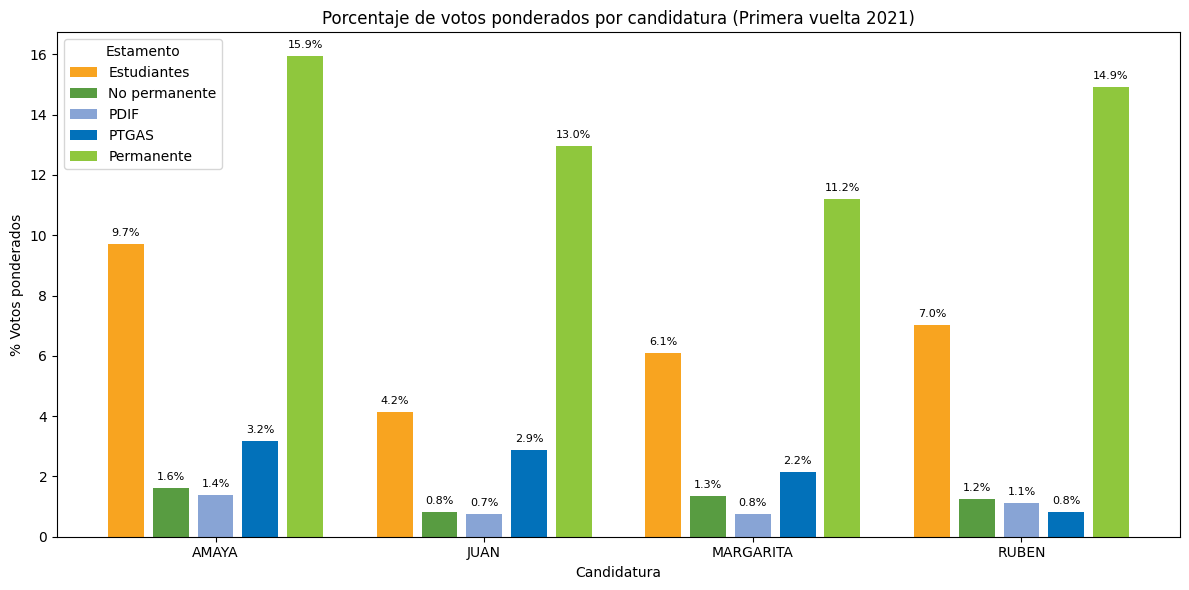

In [13]:
def graficar_barras_separadas(df: pd.DataFrame, titulo: str):
    df_graf = df.copy()
    df_graf.index = [nombre.split()[0] for nombre in df_graf.index]  
    categorias = df_graf.columns
    candidatos = df_graf.index
    n_categorias = len(categorias)
    n_candidatos = len(candidatos)

    nombres_xtick = candidatos
    ancho_grupo = n_categorias + 1
    x = np.arange(n_candidatos * ancho_grupo)
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, categoria in enumerate(categorias):
        posiciones = x[i::ancho_grupo]
        ax.bar(
            posiciones, 
            df_graf[categoria], 
            width=0.8,
            label=get_nombre(categoria), 
            color=get_color(categoria)
        )

        for pos, valor in zip(posiciones, df_graf[categoria]):
            if not np.isnan(valor) and valor > 0:
                ax.text(pos, valor + 0.2, f'{valor:.1f}%', ha='center', va='bottom', fontsize=8)

    posiciones_candidatos = x[::ancho_grupo] + (n_categorias - 1) / 2
    ax.set_xticks(posiciones_candidatos)
    ax.set_xticklabels(nombres_xtick)
    ax.set_xlabel('Candidatura')
    ax.set_ylabel('% Votos ponderados')
    ax.set_title(titulo)
    ax.legend(title='Estamento')
    plt.tight_layout()
    plt.show()

graficar_barras_separadas(ponderados_v1, 'Porcentaje de votos ponderados por candidatura (Primera vuelta 2021)')

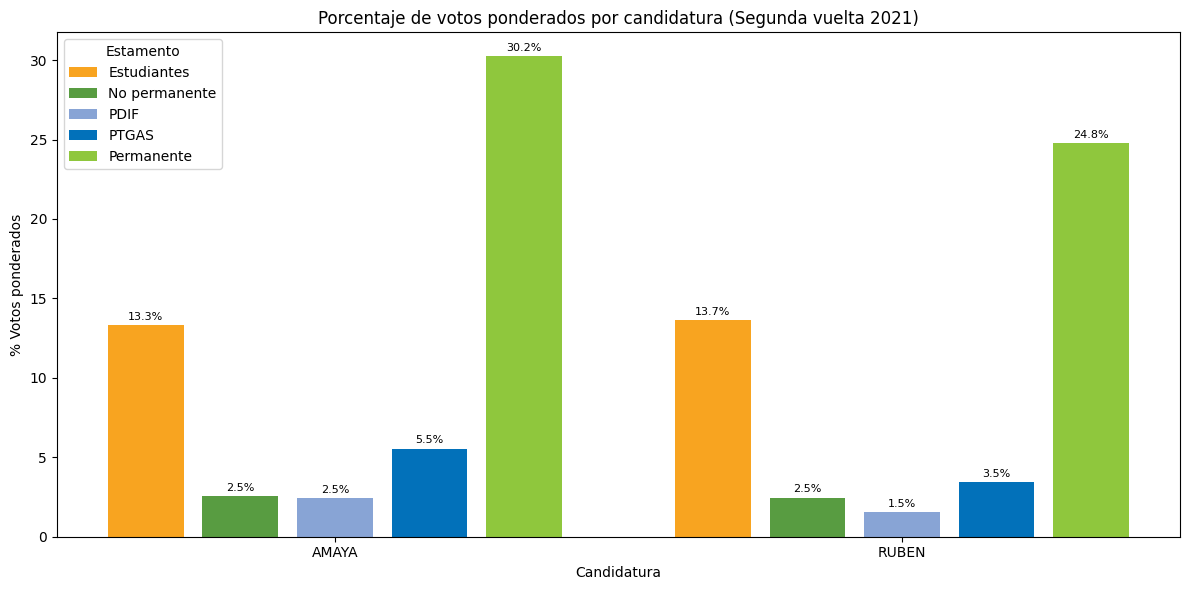

In [14]:
graficar_barras_separadas(ponderados_v2, 'Porcentaje de votos ponderados por candidatura (Segunda vuelta 2021)')

/var/folders/m4/xw4bhk_9611ck85ym_vjt4rr0000gn/T/ipykernel_43001/429506757.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, acumulado[i] + 0.5, f'{val:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')


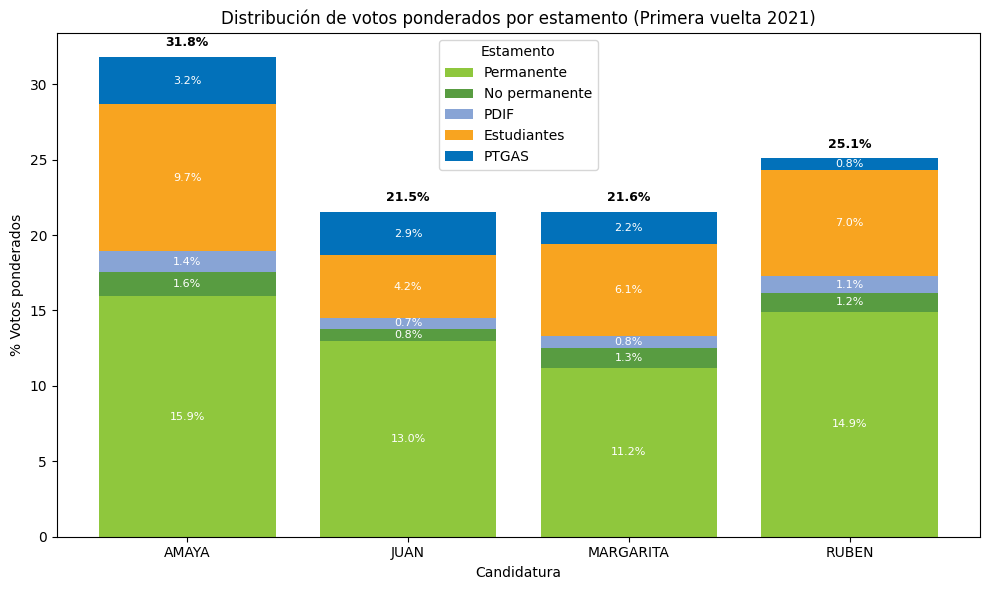

In [15]:
def graficar_barras_apiladas(df: pd.DataFrame, titulo: str):
    df_graf = df.copy()
    total = df_graf.sum(axis=1)

    df_graf.index = [nombre.split()[0] for nombre in df_graf.index]  
    df_graf = df_graf[list(estamentos_info.keys())]  

    fig, ax = plt.subplots(figsize=(10, 6))
    acumulado = np.zeros(len(df_graf))

    for estamento in df_graf.columns:
        valores = df_graf[estamento]
        barras = ax.bar(
            df_graf.index, 
            valores, 
            bottom=acumulado, 
            color=get_color(estamento), 
            label=get_nombre(estamento)
        )

        for bar in barras:
            altura = bar.get_height()
            if altura > 0:
                ax.text(
                    bar.get_x() + bar.get_width()/2, 
                    bar.get_y() + altura/2,
                    f'{altura:.1f}%', 
                    ha='center', va='center', 
                    fontsize=8, color='white'
                )

        acumulado += valores

    for i, val in enumerate(total):
        ax.text(i, acumulado[i] + 0.5, f'{val:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

    ax.set_title(titulo)
    ax.set_ylabel('% Votos ponderados')
    ax.set_xlabel('Candidatura')
    ax.set_xticks(range(len(df_graf.index)))
    ax.set_xticklabels(df_graf.index)
    ax.legend(title='Estamento')
    plt.tight_layout()
    plt.show()

graficar_barras_apiladas(ponderados_v1, 'Distribución de votos ponderados por estamento (Primera vuelta 2021)')

/var/folders/m4/xw4bhk_9611ck85ym_vjt4rr0000gn/T/ipykernel_43001/429506757.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, acumulado[i] + 0.5, f'{val:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')


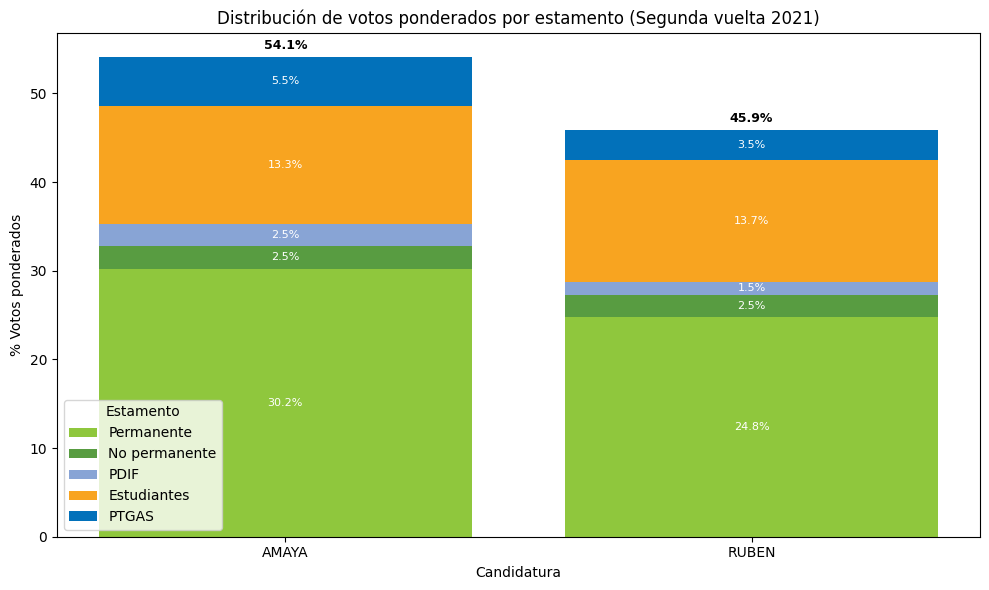

In [16]:
graficar_barras_apiladas(ponderados_v2, 'Distribución de votos ponderados por estamento (Segunda vuelta 2021)')

**Justificación del tipo de gráfico utilizado**

Para representar el porcentaje de votos ponderados por candidatura y por estamento, se ha optado por gráficos de barras verticales (y apiladas en su caso). Este tipo de gráfico es especialmente adecuado porque:

- Permite comparar de forma clara y precisa los porcentajes obtenidos por cada candidatura, tanto en el total como desglosado por estamento.
- Las diferencias entre candidatos y entre estamentos se visualizan fácilmente, incluso cuando los valores son próximos.
- Es sencillo añadir etiquetas, leyendas y personalizar colores para mejorar la interpretación.
- La escala lineal facilita la comparación directa de magnitudes.

**Comparación con los gráficos de la web oficial**

En la web oficial, se utilizan principalmente:

- Un gráfico de pastel para mostrar el porcentaje total de votos ponderados por candidato.
- Un gráfico de barras horizontales para mostrar los porcentajes por sectores (estamentos).

    **Ventajas de los gráficos realizados en el notebook:**

    - El gráfico de barras vertical (o apilado) permite comparar de un vistazo tanto el total como la distribución interna por estamento, mientras que el gráfico de pastel solo muestra la proporción global y dificulta la comparación precisa.
    - Los nombres de los candidatos pueden acortarse y disponerse horizontalmente, mejorando la legibilidad respecto a los gráficos oficiales.
    - La personalización de colores, etiquetas y leyendas es más flexible, lo que facilita la interpretación y la adaptación a las necesidades del análisis.
    - El gráfico de barras es más adecuado cuando hay más de dos o tres categorías y cuando se busca comparar valores exactos, no solo proporciones.
    
    **Conclusión:**
    - El gráfico de barras vertical (y apilado) es más informativo y preciso para comparar resultados entre candidaturas y estamentos, mientras que el gráfico de pastel es útil solo para mostrar proporciones generales, pero no para análisis detallados. Por ello, la elección de barras es más adecuada para el objetivo de este análisis.

---

### **Apartado 3: Histórico de participación por estamento (2017–2025)**

Representa la evolución de la participación de cada estamento en todas las elecciones disponibles (2017, 2021, 2025a, 2025b), incluyendo las vueltas correspondientes. El gráfico debe permitir comparar la tendencia de participación de cada estamento a lo largo del tiempo. Una 
vez realizado, responde a las siguientes preguntas: 
- ¿En qué elecciones ha habido más participación en cada uno de los estamentos?

In [17]:
# Cargar y procesar todos los ficheros de participación disponibles
def extraer_info_nombre(nombre):
    base = os.path.basename(nombre)
    partes = base.split('_')
    anio = partes[0]
    vuelta = partes[1]
    return anio, vuelta

archivos = sorted(glob.glob('data/*_participation_data.csv'))
resumen = []
for archivo in archivos:
    anio, vuelta = extraer_info_nombre(archivo)
    df = pd.read_csv(archivo, delimiter='\t')
    for estamento in df['Category'].unique():
        sub_df = df[df['Category'] == estamento]
        censo = sub_df['Censo'].sum()
        votos = sub_df['Votos'].sum()
        pct = 100 * votos / censo if censo > 0 else 0
        resumen.append({
            'Año': anio, 
            'Vuelta': vuelta, 
            'Estamento': get_nombre(estamento), 
            '% Participación': pct
        })

historico = pd.DataFrame(resumen)
historico

,Año,Vuelta,Estamento,% Participación
0,2017,v1,Permanente,71.632526
1,2017,v1,No permanente,28.448276
2,2017,v1,PDIF,33.061889
3,2017,v1,Estudiantes,9.474543
4,2017,v1,PTGAS,64.688995
5,2017,v2,Permanente,67.535692
6,2017,v2,No permanente,27.001570
7,2017,v2,PDIF,34.039088
8,2017,v2,Estudiantes,5.269013
9,2017,v2,PTGAS,63.575526


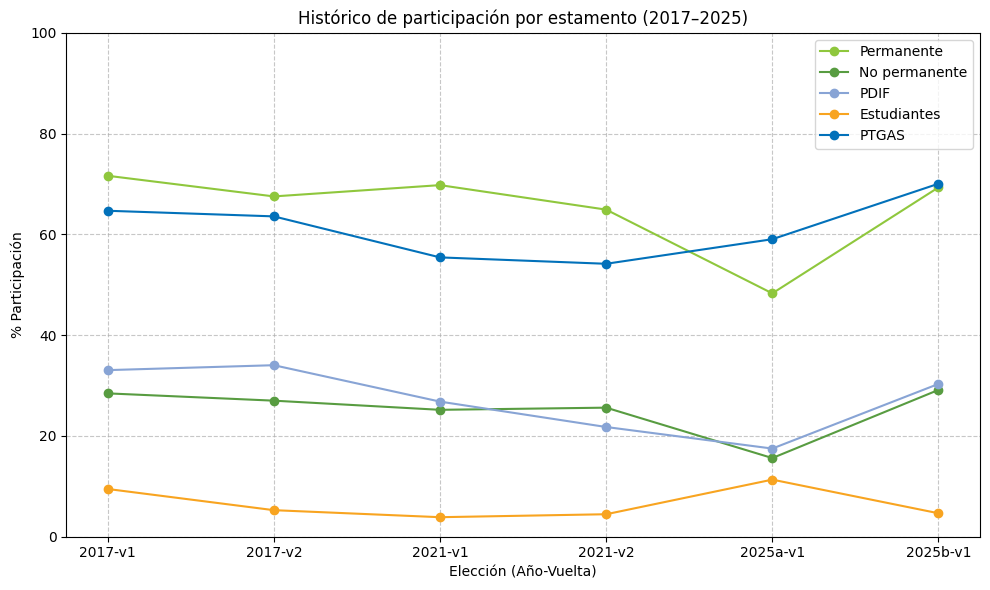

In [18]:
# Gráfico de líneas: Evolución histórica de la participación por estamento
# Usar los mismos colores que en el apartado 1
plt.figure(figsize=(10, 6))
for estamento in historico['Estamento'].unique():
    datos = historico[historico['Estamento'] == estamento]
    x = datos['Año'] + '-' + datos['Vuelta']
    color = None
    # Buscar clave original para usar get_color
    for clave, info in estamentos_info.items():
        if info['nombre'] == estamento:
            color = info['color']
            break

    plt.plot(x, datos['% Participación'], marker='o', label=estamento, color=color)
plt.ylabel('% Participación')
plt.xlabel('Elección (Año-Vuelta)')
plt.title('Histórico de participación por estamento (2017–2025)')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Justificación del gráfico de líneas para el histórico de participación por estamento**

Para analizar la evolución de la participación por estamento a lo largo de varias elecciones y vueltas, el gráfico de líneas es la opción más adecuada porque:

- Permite visualizar claramente las tendencias y cambios en la participación de cada estamento a lo largo del tiempo.
- Facilita la comparación directa entre estamentos en cada elección y la identificación de patrones o anomalías.
- El uso de diferentes colores y marcadores para cada estamento ayuda a distinguirlos fácilmente.
- Es posible observar de un vistazo en qué elecciones ha habido picos o caídas de participación para cada grupo.

Otros tipos de gráficos, como barras, serían menos eficaces para mostrar la evolución temporal y las comparaciones simultáneas entre varios grupos.

**Respuesta: ¿En qué elecciones ha habido más participación en cada uno de los estamentos?**

Analizando el gráfico generado:

- **Permanente:** La mayor participación se observa en 2017-v1, aunque también es alta en 2025b-v1.
- **No_Permanente:** El valor más alto se da en 2017-v2 y 2017-v1, con un repunte en 2025b-v1.
- **PDIF:** La participación máxima se alcanza en 2017-v2 y 2017-v1, y vuelve a subir en 2025b-v1.
- **Estudiantes:** El mayor porcentaje se da en 2017-v1, con una caída progresiva en las siguientes elecciones.
- **PTGAS:** La mayor participación se observa en 2025b-v1, seguida de cerca por 2017-v1.

En resumen, la participación más alta para la mayoría de los estamentos se da en las elecciones de 2017 (especialmente en la primera vuelta), aunque en el caso de PTGAS y algunos otros hay un repunte en 2025b-v1.

## **Parte 2: Múltiples gráficos con matplotlib (subplots)**

En esta segunda parte vamos a repetir los mismos ejercicios de la Parte 1, pero ahora desglosando los resultados por centro o facultad de la UAM. El objetivo es aprender a trabajar con múltiples gráficos en una misma figura (subplots) y a mejorar su presentación visual. Todos los gráficos deben realizarse con la librería matplotlib. No se especifica la disposición de los subplots ni las modificaciones de estilo que debes aplicar: deberás decidir qué organización es más adecuada en cada caso (rejilla de subplots, disposición por filas o columnas, etc.). En el notebook, tras cada figura deberás escribir una breve justificación explicando por qué has elegido esa representación con subplots y, en caso de haber aplicado modificaciones de estilo 
(como compartir ejes, unificar la leyenda, modificar colores o tipografías, ajustar espaciados, etc.), deberás justificar también esas decisiones de diseño. 

### **Apartado 1: Participación por estamento y centro (2021)**

Representa los porcentajes de participación por estamento, desglosados por centro, para la primera y la segunda vuelta de las elecciones de 2021. Cada subplot debe mostrar los datos de un centro distinto. Una vez realizado, responde a la siguiente pregunta:
 
- ¿Qué centro y qué estamento tuvo la máxima participación en cada una de las vueltas de las elecciones de 2021?

### **Apartado 2: Votos ponderados por candidatura y centro (2021)**

Representa los porcentajes de votos ponderados por candidato, desglosados por centro, tanto en la primera como en la segunda vuelta de las elecciones de 2021. Cada subplot debe corresponder a un centro distinto. 

- ¿En qué centro obtuvo el/la candidato/a ganador/a el mayor porcentaje de votos ponderados?

### **Apartado 3: Histórico de participación por estamento y centro (2017–2025)**

Representa la evolución de la participación de cada estamento en todas las elecciones, pero desglosada por centro. Cada subplot debe mostrar los resultados históricos de un centro. 

Responde a la siguiente pregunta: 
- ¿En qué año, centro y estamento se obtuvo la mínima y la máxima participación?

### **Apartado 4: Exportación de las gráficas**

Exporta las gráficas de los Apartados 1-3 en ficheros PDF. Las gráficas deben tener la mejor calidad de imagen posible.